In [1]:
import pandas as pd

In [3]:
import numpy as np 

In [7]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

In [13]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10      0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [19]:
df.duplicated('CustomerId').sum()

0

In [21]:
df = df.set_index('CustomerId')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [33]:
#encoding
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [35]:
df.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [37]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [43]:
df.replace({'Gender': {'Male':0, 'Female':1}}, inplace=True)

In [47]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [51]:
df.replace({'Num Of Products': {1: 0, 2:1, 3:1, 4:1 }}, inplace=True)  #Clubbing 234 category as one category

In [53]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [55]:
df['Is Active Member'].value_counts() 

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [57]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()   #0- 3117 customers have zero bank balance but are still in the bank, 1- 500 customers who have zero bank balance have left the bank

Churn
0    3117
1     500
Name: count, dtype: int64

In [59]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

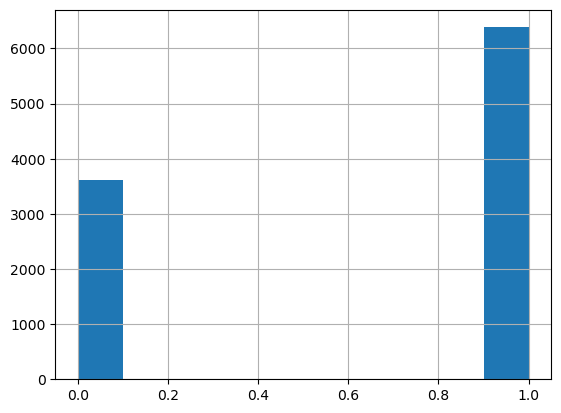

In [61]:
df['Zero Balance'].hist()

In [63]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [65]:
#define label and features
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [67]:
x= df.drop(['Surname', 'Churn'], axis=1)

In [69]:
y= df['Churn']

In [71]:
x.shape, y.shape

((10000, 11), (10000,))

In [73]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

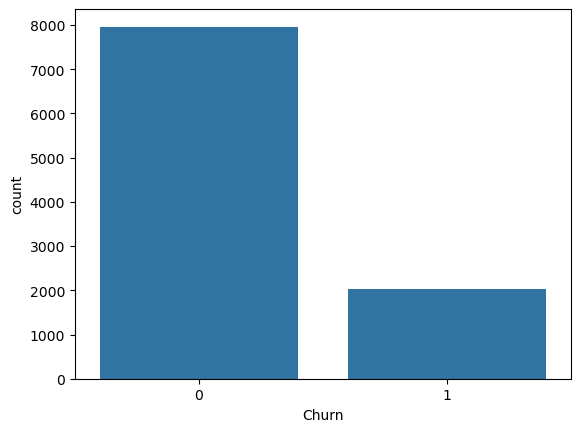

In [75]:
sns.countplot(x = 'Churn', data = df);

In [77]:
#random under sampling
from imblearn.under_sampling import RandomUnderSampler

In [79]:
rus = RandomUnderSampler(random_state=2529)

In [85]:
x_rus, y_rus = rus.fit_resample(x,y)

In [87]:
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [89]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [91]:
 y_rus.value_counts()               #rus= random under sampling

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

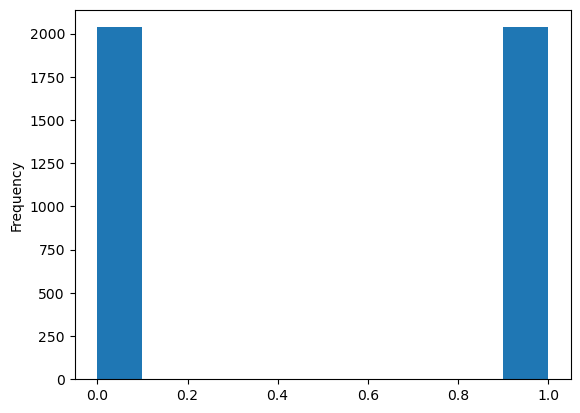

In [93]:
y_rus.plot(kind = 'hist')

In [97]:
#random over sampling 
from imblearn.over_sampling import RandomOverSampler

In [99]:
ros= RandomOverSampler(random_state=2529)

In [101]:
x_ros, y_ros= ros.fit_resample(x,y)

In [103]:
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [105]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [107]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

In [109]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

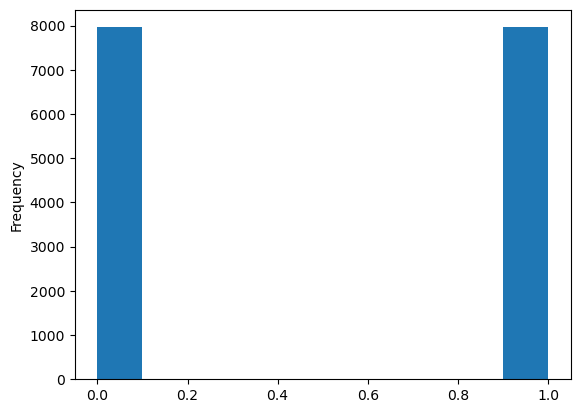

In [111]:
y_ros.plot(kind = 'hist')

In [113]:
from sklearn.model_selection import train_test_split       #train test split, then split original data, then split RUS data, split ROS data

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2529)

In [119]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=2529)

In [121]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_ros, y_ros, test_size=0.3, random_state=2529)

In [123]:
#standard features
from sklearn.preprocessing import StandardScaler 

In [125]:
sc = StandardScaler()

In [131]:
#standardize original data
x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [133]:
x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [139]:
#standardize random under sample data
x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [143]:
x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [145]:
#standardize random over sample data
x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [151]:
x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(x_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [153]:
#support vector machine classifier
from sklearn.svm import SVC

In [155]:
svc = SVC()

In [157]:
svc.fit(x_train, y_train)             #raw dataset

SVC()

In [159]:
y_pred = svc.predict(x_test)

In [169]:
#model accuracy
from sklearn.metrics import confusion_matrix, classification_report

In [171]:
confusion_matrix(y_test, y_pred)

array([[2381,   33],
       [ 436,  150]], dtype=int64)

In [175]:
print(classification_report(y_test, y_pred))               #accuracy - 84%, people who are churning/ leaving the bank, recall is 26% i.e. model is not good for predicting the churning bcs of imbalance data

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [177]:
#using hyperparameter tunning for improvement may be for better treating of imbalance 
from sklearn.model_selection import GridSearchCV

In [179]:
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [185]:
grid = GridSearchCV(SVC(), param_grid,refit=True,verbose=2, cv = 2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [187]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [189]:
grid_predictions = grid.predict(x_test)

In [193]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [195]:
print(classification_report(y_test,grid_predictions))     #overall accuracy came down to 80 but atleast better for predicting chruning 

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [197]:
#model with random under sampling
svc_rus = SVC()

In [199]:
svc_rus.fit(x_train_rus, y_train_rus)

SVC()

In [203]:
y_pred_rus = svc_rus.predict(x_test_rus)

In [205]:
#model accuracy
confusion_matrix(y_test_rus, y_pred_rus)

array([[470, 157],
       [174, 422]], dtype=int64)

In [207]:
print(classification_report(y_test_rus, y_pred_rus))      #this model is better then the previous one

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [209]:
#Hyperparameter tunning
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [211]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [213]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [215]:
grid_predictions_rus = grid_rus.predict(x_test_rus)

In [217]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]], dtype=int64)

In [223]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [225]:
#model with random over sampling 
svc_ros = SVC()

In [227]:
svc_ros.fit(x_train_ros, y_train_ros)

SVC()

In [229]:
y_pred_ros = svc_ros.predict(x_test_ros)

In [233]:
#model accuarcy
confusion_matrix(y_test_ros, y_pred_ros)

array([[1823,  556],
       [ 626, 1773]], dtype=int64)

In [235]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [237]:
#hyperparameter tunning
param_grid = {'C': [0.1,1,10],
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight' : ['balanced']}

In [239]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   8.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [240]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [241]:
grid_predictions_ros = grid_ros.predict(x_test_ros)

In [244]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]], dtype=int64)

In [248]:
print(classification_report(y_test_ros,grid_predictions_ros)) #this model is performing better than before 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



In [250]:
#in conclusion, showning all the predictions 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [252]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [254]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [256]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [258]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778

